In [1]:
#Frame the problem and look at the big picture
#Get the data
#Explore the data to gain insights
#Prepare the data to better expose the underlying data patterns to machine learning algorithms
#Explore many different models and short-list the best ones
#Fine-tune your models and combine them into a great solution
#Present your solution
#Launch, monitor and maintain your system

## Frame the problem and look at the big picture

In this project we are going to train a neural network for image recognition. The dataset we will be using contains .... After we have fine-tuned the model and finished training it, we will deploy it on our web-app. From there you can upload a image of a .... and get the classification of the image. 

We will use Tensorflow with keras for the neural network. 

## Get the data

In [28]:
#Import the libraries
import tensorflow as tf
from tensorflow import keras
from keras.models import Sequential
from keras.layers import Dense, Flatten, Conv2D, MaxPooling2D, Dropout
from tensorflow.keras import layers
from keras.utils import to_categorical
import numpy as np
import matplotlib.pyplot as plt
from pathlib import Path
plt.style.use('fivethirtyeight')

In [3]:
#Load the data
from keras.datasets import cifar10
(x_train, y_train), (x_test, y_test) = cifar10.load_data()

## Explore the data to gain insights

In [4]:
#Look at the data types
print(type(x_train))
print(type(y_train))
print(type(x_test))
print(type(y_test))

<class 'numpy.ndarray'>
<class 'numpy.ndarray'>
<class 'numpy.ndarray'>
<class 'numpy.ndarray'>


In [5]:
#Get the shape of the arrays
print('x_train: ', x_train.shape)
print('y_train: ', y_train.shape)
print('x_test: ', x_test.shape)
print('y_test: ', y_test.shape)

x_train:  (50000, 32, 32, 3)
y_train:  (50000, 1)
x_test:  (10000, 32, 32, 3)
y_test:  (10000, 1)


In [6]:
#We take a look at the first image
index = 0
x_train[index]

array([[[ 59,  62,  63],
        [ 43,  46,  45],
        [ 50,  48,  43],
        ...,
        [158, 132, 108],
        [152, 125, 102],
        [148, 124, 103]],

       [[ 16,  20,  20],
        [  0,   0,   0],
        [ 18,   8,   0],
        ...,
        [123,  88,  55],
        [119,  83,  50],
        [122,  87,  57]],

       [[ 25,  24,  21],
        [ 16,   7,   0],
        [ 49,  27,   8],
        ...,
        [118,  84,  50],
        [120,  84,  50],
        [109,  73,  42]],

       ...,

       [[208, 170,  96],
        [201, 153,  34],
        [198, 161,  26],
        ...,
        [160, 133,  70],
        [ 56,  31,   7],
        [ 53,  34,  20]],

       [[180, 139,  96],
        [173, 123,  42],
        [186, 144,  30],
        ...,
        [184, 148,  94],
        [ 97,  62,  34],
        [ 83,  53,  34]],

       [[177, 144, 116],
        [168, 129,  94],
        [179, 142,  87],
        ...,
        [216, 184, 140],
        [151, 118,  84],
        [123,  92,  72]]

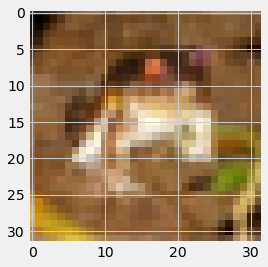

In [7]:
#Show the first row as an image
img = plt.imshow(x_train[index])

Looks like a frog. Lets check if that is correct.

In [8]:
#Get the image classification
classification = ['airplane', 'automobile', 'bird', 'cat', 'deer', 'dog', 'frog', 'horse', 'ship', 'truck']
#Print the image class
print('The image class is: ', classification[y_train[index][0]])

The image class is:  frog


## Prepare the data to better expose the underlying data patterns to machine learning algorithms

In [9]:
#Convert the labels into a set of 10 numbers to input into the neural network
y_train_one_hot = to_categorical(y_train)
y_test_one_hot = to_categorical(y_test)

In [10]:
#Print the new labels
print(y_train_one_hot)

[[0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 1.]
 [0. 0. 0. ... 0. 0. 1.]
 ...
 [0. 0. 0. ... 0. 0. 1.]
 [0. 1. 0. ... 0. 0. 0.]
 [0. 1. 0. ... 0. 0. 0.]]


In [11]:
#Print the new label of the current image above
print('The one hot label is: ', y_train_one_hot[index])

The one hot label is:  [0. 0. 0. 0. 0. 0. 1. 0. 0. 0.]


In [12]:
#Normalize the pixels to be values between 0 and 1
x_train = x_train / 255
x_test = x_test / 255

In [13]:
x_train[index]

array([[[0.23137255, 0.24313725, 0.24705882],
        [0.16862745, 0.18039216, 0.17647059],
        [0.19607843, 0.18823529, 0.16862745],
        ...,
        [0.61960784, 0.51764706, 0.42352941],
        [0.59607843, 0.49019608, 0.4       ],
        [0.58039216, 0.48627451, 0.40392157]],

       [[0.0627451 , 0.07843137, 0.07843137],
        [0.        , 0.        , 0.        ],
        [0.07058824, 0.03137255, 0.        ],
        ...,
        [0.48235294, 0.34509804, 0.21568627],
        [0.46666667, 0.3254902 , 0.19607843],
        [0.47843137, 0.34117647, 0.22352941]],

       [[0.09803922, 0.09411765, 0.08235294],
        [0.0627451 , 0.02745098, 0.        ],
        [0.19215686, 0.10588235, 0.03137255],
        ...,
        [0.4627451 , 0.32941176, 0.19607843],
        [0.47058824, 0.32941176, 0.19607843],
        [0.42745098, 0.28627451, 0.16470588]],

       ...,

       [[0.81568627, 0.66666667, 0.37647059],
        [0.78823529, 0.6       , 0.13333333],
        [0.77647059, 0

## Explore many different models and short-list the best ones

In [14]:
#Create the models architecture
model = Sequential()

#Add the first layer 
model.add( Conv2D(32, (5,5), activation='relu', input_shape=(32,32,3)) )

#Add a pooling layer
model.add( MaxPooling2D(pool_size= (2,2)) )

#Add another convolution layer
model.add( Conv2D(32, (5,5), activation='relu') ) 

#Add another pooling layer
model.add( MaxPooling2D(pool_size= (2,2)) )

#Add a flattening layer
model.add(Flatten())

#Add a layer with 1000 neurons
model.add(Dense(1000, activation='relu'))

#Add a drop out layer
model.add(Dropout(0.5))

#Add another layer with 500 neurons
model.add(Dense(500, activation='relu'))

#Add another drop out layer
model.add(Dropout(0.5))

#Add another layer with 250 neurons
model.add(Dense(250, activation='relu'))

#Add another layer with 10 neurons
model.add(Dense(10, activation='softmax'))

In [15]:
#Compile the model
model.compile(loss = 'categorical_crossentropy',
              optimizer = 'adam',
              metrics = ['accuracy'])

In [16]:
#Train the model
hist = model.fit(x_train, y_train_one_hot,
                 batch_size = 256,
                 epochs = 10,
                 validation_split = 0.2)

Epoch 1/10
157/157 [==============================] - 40s 252ms/step - loss: 1.7862 - accuracy: 0.3353 - val_loss: 1.4782 - val_accuracy: 0.4673
Epoch 2/10
157/157 [==============================] - 34s 218ms/step - loss: 1.4115 - accuracy: 0.4868 - val_loss: 1.3266 - val_accuracy: 0.5354
Epoch 3/10
157/157 [==============================] - 35s 222ms/step - loss: 1.2575 - accuracy: 0.5471 - val_loss: 1.1879 - val_accuracy: 0.5744
Epoch 4/10
157/157 [==============================] - 32s 203ms/step - loss: 1.1389 - accuracy: 0.5907 - val_loss: 1.1134 - val_accuracy: 0.6024
Epoch 5/10
157/157 [==============================] - 32s 201ms/step - loss: 1.0622 - accuracy: 0.6209 - val_loss: 1.0420 - val_accuracy: 0.6309
Epoch 6/10
157/157 [==============================] - 30s 188ms/step - loss: 0.9890 - accuracy: 0.6474 - val_loss: 1.0295 - val_accuracy: 0.6389
Epoch 7/10
157/157 [==============================] - 30s 188ms/step - loss: 0.9275 - accuracy: 0.6724 - val_loss: 1.0203 - val_ac

In [17]:
#Evaluate the model using the test data set
model.evaluate(x_test, y_test_one_hot)[1]

313/313 [==============================] - 2s 8ms/step - loss: 0.9553 - accuracy: 0.6720


0.671999990940094

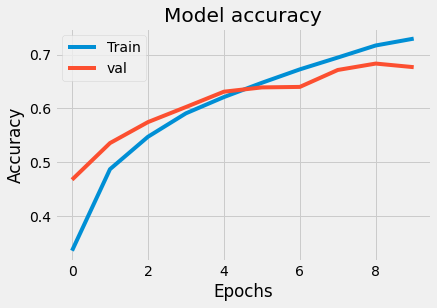

In [18]:
#Vizualise the models accuracy
plt.plot(hist.history['accuracy'])
plt.plot(hist.history['val_accuracy'])
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epochs')
plt.legend(['Train', 'val'], loc='upper left')
plt.show()

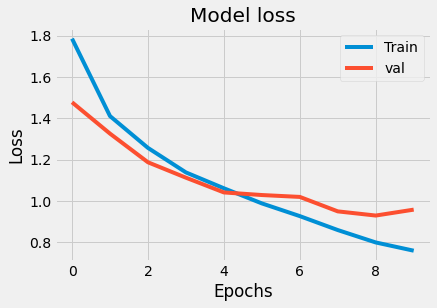

In [19]:
#Visualize the models loss
plt.plot(hist.history['loss'])
plt.plot(hist.history['val_loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epochs')
plt.legend(['Train', 'val'], loc='upper right')
plt.show()

In [20]:
#Test the model with an example
#from google.colab import files
#uploaded = import "bird.jpg"

#from PIL import Image
#im  = Image.open("bird.jpg")


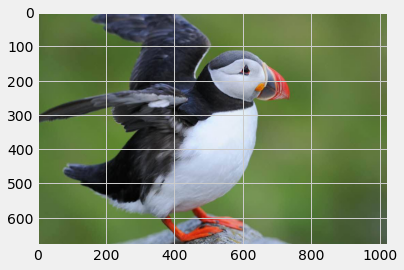

In [21]:
#show the image
new_image = plt.imread("bird.jpg")
img = plt.imshow(new_image)

In [22]:
#Resize the image
from skimage.transform import resize
resized_image = resize(new_image, (32,32,3))
img = plt.imshow(resized_image)

ModuleNotFoundError: No module named 'skimage'

In [23]:
#Get the models predictions
predictions = model.predict(np.array([resized_image]))

#Show the predictions
predictions

NameError: name 'resized_image' is not defined

In [24]:
#Sort the predictions from least to greatest
list_index = [0,1,2,3,4,5,6,7,8,9]
x = predictions

for i in range(10):
  for j in range(10):
    if x[0][list_index[i]] > x[0][list_index[j]]:
      temp = list_index[i]
      list_index[i] = list_index[j]
      list_index[j] = temp

#Show the sorted labels in order
print(list_index)

NameError: name 'predictions' is not defined

In [25]:
#print the first 5 predictions
for i in range(5):
  print(classification[list_index[i]], ':', round(predictions[0][list_index[i]] * 100, 2), '%')

NameError: name 'predictions' is not defined

## Fine-tune your models and combine them into a great solution

## Present your solution

## Launch, monitor and maintain your system

In [34]:
NB_DIR = Path.cwd()
#DATA_DIR = NB_DIR/'..'/'data'

In [38]:
MODEL_DIR = NB_DIR/'.'/'models'

In [39]:
from joblib import dump

In [40]:
dump(model, MODEL_DIR/'imageRecModel.joblib', compress=6)

TypeError: cannot pickle '_thread.RLock' object